In [33]:
import pandas as pd
import numpy as np
import plotnine as p9


In [34]:
df =pd.read_csv("C:\\Users\\tmeyl\\Downloads\\eod_20230908_f.csv.gz", compression='gzip', header=0, sep=',', quotechar='"')

C:\Users\tmeyl\AppData\Local\Temp\ipykernel_17148\210593162.py:1: DtypeWarning: Columns (14,59) have mixed types. Specify dtype option on import or set low_memory=False.


In [60]:

cols = [
    'Trade Date',
    'Product Description', 
    'Product Type',
    'Underlying Product Code',
    'Put/Call', 
    'Strike Price',
    'Contract Year',
    'Contract Month',
    'Contract Day', 
    'Settlement',
    'Delta',
    'Implied Volatility', 
    
]

# df[(df['Clearing Code'] == 'PY') & (df['Product Description']=='CORN OPTIONS')&(df['Contract Year'] == 2023) & (df['Contract Month'] == 12)][cols]
# df[(df['Clearing Code'] == 'PY') & (df['Product Description']=='CORN OPTIONS')].columns & `Strike Price` < 725'

calls = df.query('`Clearing Code` == "PY" & `Product Description` == "CORN OPTIONS" & `Contract Year` == 2023 & `Contract Month` == 12 & `Put/Call`=="C"')[cols]


In [61]:
from scipy.interpolate import CubicSpline

In [66]:
c = calls[['Strike Price', 'Implied Volatility']].sort_values('Strike Price')

In [67]:
cs = CubicSpline(c['Strike Price'], c['Implied Volatility'])


In [71]:
c['Strike Price'].min(), c['Strike Price'].max()

(380.0, 1500.0)

In [ ]:
np.arange(400, 800, 0.25)

In [68]:
test = pd.DataFrame({'x': np.arange(400, 800, 0.25), 'y': cs()})

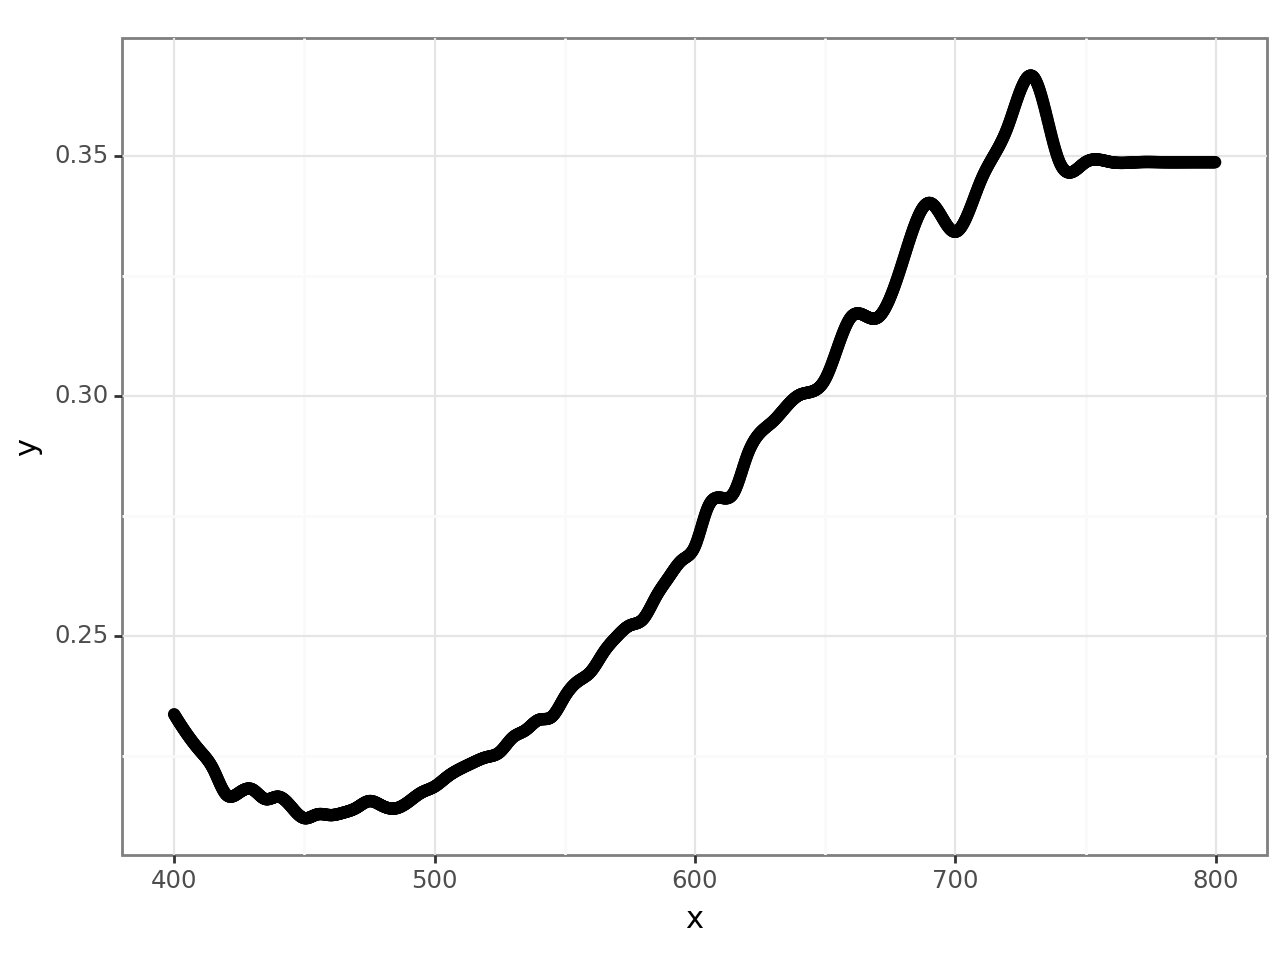

<Figure Size: (640 x 480)>

In [69]:
p9.ggplot(test, p9.aes(x='x', y='y')) + p9.geom_point() + p9.theme_bw()

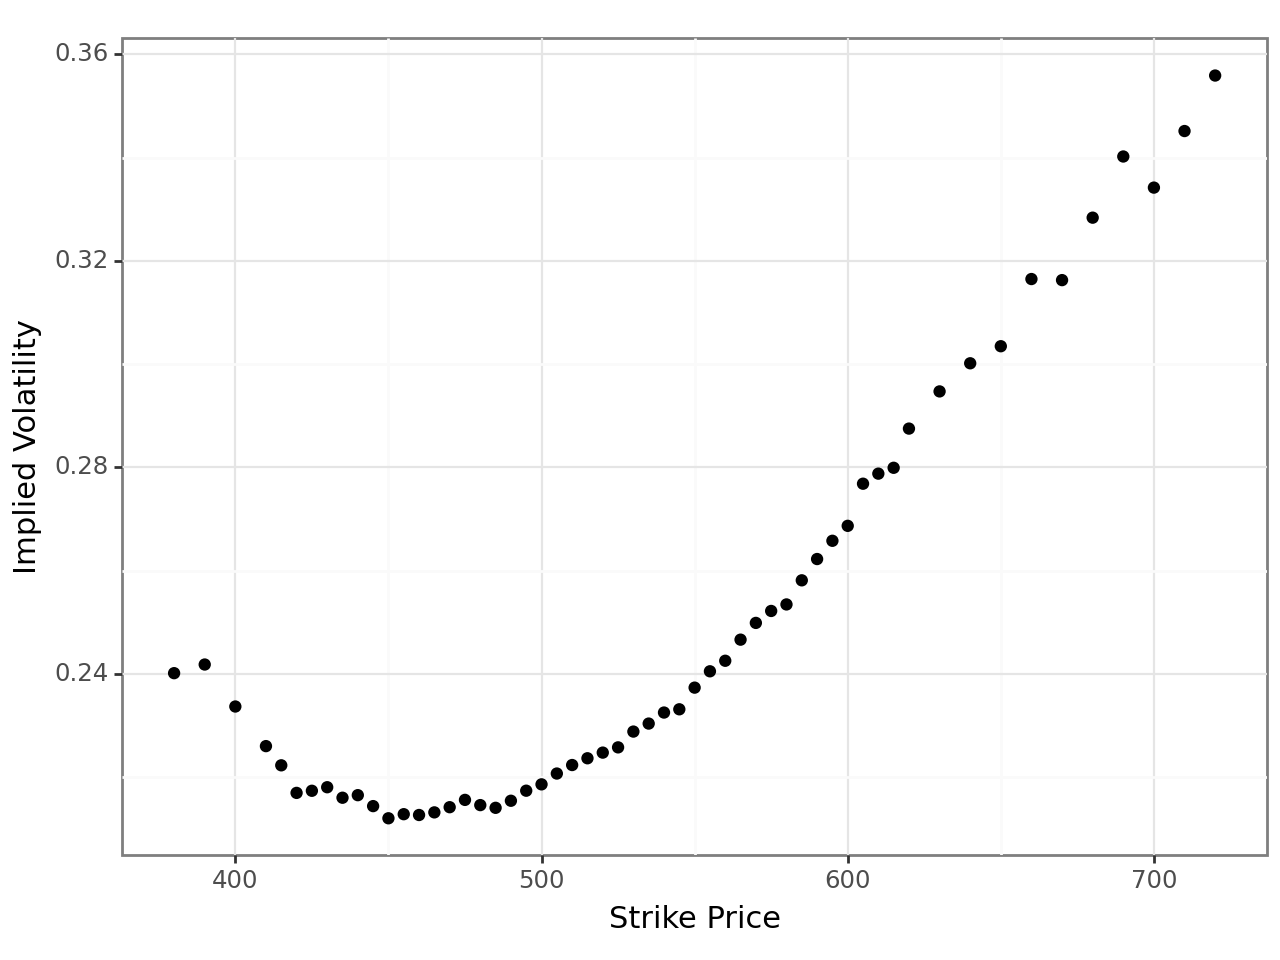

<Figure Size: (640 x 480)>

In [44]:
p9.ggplot(calls, p9.aes(x='Strike Price', y='Implied Volatility')) + p9.geom_point() + p9.theme_bw()